### CS 5012: Foundations of Computer Science
#### Asymptotic Analysis

Last Updated: February 15, 2022


Objectives: 

- Review different order classes
- Present code examples illustrating the order classes

---

#### Order Classes

$O(1)$  
constant time ~ arithmetic operations, comparison operators, variable declaration,
assignment statement, invoking a method, returning first/last item in an array

$O(log n)$  
logarithmic time ~ dividing search space in half each time (taking a list of items,
cutting it in half repeatedly until there's only one item left) e.g. binary search

$O(n)$  
linear time ~ iterate over n elements, utilizing a loop (e.g. for-loop over all n
elements) printing a list of n items, looking at each item once, allocate array of size n

$O(n log n)$  
“n log n” ~ quicksort, mergesort

$O(n^2)$  
quadratic time ~ looping over n elements twice, utilizing two for-loops one nested within the other  
(e.g. taking a list of n items, and comparing every item to every other item),
allocate an nxn array 

$O(n^3)$  
cubic time ~ looping over n elements three times, utilizing three for-loops nested
within each other

$O(2^n)$  
exponential time ~ essentially “brute force”

---

**Code Examples**

[1] Example of $O(1)$  
Check if first element is null

In [4]:
def IfFirstElementNull(strings):
    '''
    returns True if first element None, else False
    '''
    if strings[0] == None:
        return True
    return False

test = ['a', 'b', 'c']
print(IfFirstElementNull(test))
test[0] = None
print(IfFirstElementNull(test))

False
True


**Explanation of [1]**  

This algorithm will always execute in the same time (or space) regardless of the size of the input
data set. Therefore it runs in constant time O(1).

---

[2] Example of $O(n)$  
Sum the numbers in a list. The problem size, *n*, is the length of the list.

In [5]:
A = [1, 2, 3, 4, 5]
n = 5
total = 0;

for i in range(n):
    total = total + A[i]
print(total)


15


**Explanation of [2]**  

This algorithm performs the same operation, $total = total + A[i]$, *n* times. 

The total time spent on this operation is $a*n$, where a is the time it takes to perform the operation once. 

The value of *i* is incremented and is compared to *n* each time through the loop. This adds an additional time of $b*n$ to the run time, for some constant *b*. Furthermore, *i* and *total* both have to be initialized to zero; this adds some constant
amount *c* to the running time. 

The exact running time would then be $(a+b)*n+c$, where the
constants *a*, *b*, and *c* depend on factors such as how the code is compiled and what computer it is
run on. 

Using the fact that *c* is less than or equal to $c*n$ for any positive integer *n*, we can say that
the run time is less than or equal to $(a+b+c)*n$. That is, the run time is less than or equal to a constant times *n*.

By definition, this means that the run time for this algorithm is $O(n)$.  

---  

[3] Example of $O(n^2)$  
Bubble Sort

In [6]:
def simpleBubbleSort(A):
    n  = len(A)
    for i in range(n):
        for j in range(n-1):
            if A[j] > A[j+1]:
                temp = A[j]
                A[j] = A[j+1]
                A[j+1] = temp
    return A

A = [5, 4, 2, 3, 1]
print('A:', A)
simpleBubbleSort(A)
print('sorted A:', A)

A: [5, 4, 2, 3, 1]
sorted A: [1, 2, 3, 4, 5]


**Explanation of [3]**  

The outer for loop in the method is executed *n* times.  
Each time the outer for loop is executed, the inner for loop is executed $n-1$ times, so
the *if* statement is executed $n*(n-1)$ times. 

This is $n^2-n$ but since lower order terms are not significant in an asymptotic analysis,  
it's good enough to say that the if statement is executed about $n^2$ times. 

Furthermore, if we look at other operations -- the assignment statements,
incrementing *i* and *j*, etc. -- none of them are executed more than $n^2$ times, so the run time of the
`simpleBubbleSort` algorithm is $O(n^2)$.

---
[4] Example of $O(log n)$  
Binary Search

In [7]:
def binary_search(A, key, imin, imax):
    while imax >= imin:
        imid = int(imin + (imax - imin) / 2)
        if A[imid] == key:
            return imid
        if A[imid] < key:
            imin = imid + 1
        if A[imid] > key:
            imax = imid - 1
    print("KEY_NOT_FOUND")
    return None

# data
A = [2, 4, 6, 8, 10]
key = 4; imin = 0; imax = 4;

print('Test 1: find key', key)
print('found in index:', binary_search(A, key, imin, imax))

key = 5
print('')
print('Test 2: find key', key)
print('found in index:', binary_search(A, key, imin, imax))

Test 1: find key 4
found in index: 1

Test 2: find key 5
KEY_NOT_FOUND
found in index: None


---

[5] Example of $O(n^2)$: [two separate parts; but still $O(n^2)$]


In [8]:
def eg_sort(inArr):
    N = len(inArr)
    outArr = [0 for i in range(N)]
    
    for i in range(N):
        outArr[i] = inArr[i]

    for i in range(N):
        for j in range (i+1, N):
            if outArr[i] > outArr[j]:
                tmp = outArr[i]
                outArr[i] = outArr[j]
                outArr[j] = tmp
    return outArr

inArr = [2, 3, 5, 4, 1]
print(eg_sort(inArr))

[1, 2, 3, 4, 5]


---

**Try for Yourself**

Try running these algorithms for different lengths *n* of data and measuring the runtimes.   
Plot *n* versus runtime to check if the curve matches what you expect.  

To easily scale the data, you can try repeating it with *np.repeat(data, k)*

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

Example using `simpleBubbleSort`

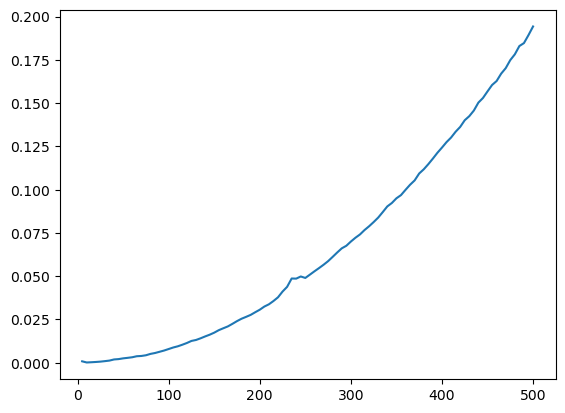

In [10]:
runtimes = []
sizes = []
copies = range(1,101)
A = [5, 4, 2, 3, 1]
n = len(A)

for copy in copies:
    
    # start the clock
    t1 = time.time()
    
    simpleBubbleSort(np.repeat(A,copy))
    
    # stop the clock
    t2 = time.time()-t1
    
    runtimes.append(t2)
    sizes.append(n*copy) # data size

plt.plot(sizes, runtimes)
plt.show()